## Clasificación binaria

*  la ultima capa tendrá una beurobna de salida con activación sigmoid para convertir a 0 o 1
* La función de coste será binary Cross Entropy, ya que es diferenciable (se pùeden calcular derivadas sobre ella)

In [1]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


In [2]:
keras = tf.keras

In [3]:
data = load_breast_cancer()
X = data.data        # Matriz de características
y = data.target      # Vector de etiquetas (0 = maligno, 1 = benigno)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
# 0. random state
keras.backend.clear_session()
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

# 1, Arquitectura red neuronal
model = keras.Sequential([
    #keras.layers.Input(shape=(X.shape[1])), # calcula el numero de columnas de X y lo añade, pero no es necesario, lo detecta auto maticamente
    keras.layers.Dense(64, activation='relu'), # una capa
    keras.layers.Dense(64, activation='relu'), # una capa
    keras.layers.Dense(1, activation='sigmoid'), # capa de salida para clasificacion binaria
    
])

# 2. Compilar el modelo:
model.compile(
    loss = keras.losses.BinaryCrossentropy(), # es la función más importante!el que vamos a optimizar
    optimizer = keras.optimizers.Adam(), # Adam es el mas sofisticado
    metrics = ['accuracy',
               keras.metrics.Precision(),
               keras.metrics.Recall(),
               keras.metrics.AUC()]
)

# 3. Fit model (entrenar el modelo)
# batch_size: por defecto es 32, indica cuántos ejemplos se utilizan en cada iteración del entrenamiento
model.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=1, batch_size=32)



Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5670 - auc: 0.6200 - loss: 5.9289 - precision: 0.6801 - recall: 0.4928 - val_accuracy: 0.8022 - val_auc: 0.7247 - val_loss: 3.5641 - val_precision: 0.7632 - val_recall: 1.0000
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7830 - auc: 0.8514 - loss: 0.9269 - precision: 0.8486 - recall: 0.7962 - val_accuracy: 0.8681 - val_auc: 0.8409 - val_loss: 2.4358 - val_precision: 0.8485 - val_recall: 0.9655
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8295 - auc: 0.9076 - loss: 0.6127 - precision: 0.8995 - recall: 0.8190 - val_accuracy: 0.8901 - val_auc: 0.8511 - val_loss: 2.0922 - val_precision: 0.8636 - val_recall: 0.9828
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8662 - auc: 0.9106 - loss: 0.5605 - precision: 0.9055 - recall: 0.8792 - val_accuracy: 0.8901 - val_auc: 0.8487 - val_loss: 1.6977 - val_precision: 0.8636 - val_recall: 0.9828
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,629 (72.77 KB)

 Trainable params: 6,209 (24.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,420 (48.52 KB)

In [6]:
df_history = pd.DataFrame(model.history.history)
df_history.head(10)

,accuracy,auc,loss,precision,recall,val_accuracy,val_auc,val_loss,val_precision,val_recall
0,0.582418,0.637271,4.447689,0.731707,0.526316,0.802198,0.724660,3.564057,0.763158,1.000000
1,0.755495,0.823320,1.258329,0.839024,0.754386,0.868132,0.840909,2.435847,0.848485,0.965517
2,0.804945,0.874226,0.884530,0.882927,0.793860,0.890110,0.851097,2.092167,0.863636,0.982759
3,0.843407,0.881660,0.770956,0.886878,0.859649,0.890110,0.848746,1.697719,0.863636,0.982759
4,0.859890,0.896849,0.602086,0.886463,0.890351,0.857143,0.828109,1.261285,0.868852,0.913793
5,0.895604,0.920907,0.431564,0.916667,0.916667,0.857143,0.843260,0.993595,0.868852,0.913793
6,0.890110,0.924116,0.402830,0.901709,0.925439,0.846154,0.896552,0.750341,0.879310,0.879310
7,0.909341,0.936194,0.331108,0.911392,0.947368,0.857143,0.910919,0.595950,0.881356,0.896552
8,0.906593,0.943160,0.302734,0.911017,0.942982,0.857143,0.915360,0.543219,0.924528,0.844828
9,0.906593,0.935130,0.324514,0.907563,0.947368,0.835165,0.917973,0.526685,0.921569,0.810345


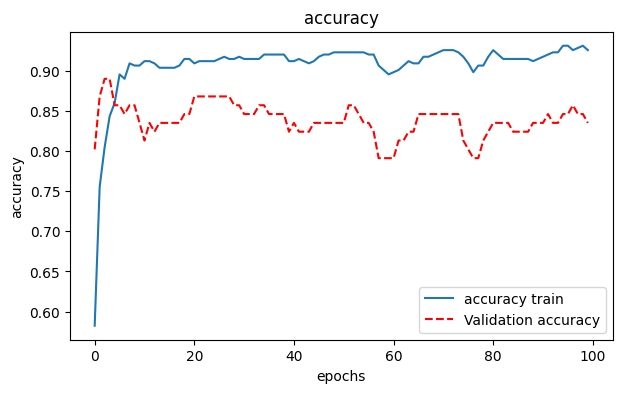

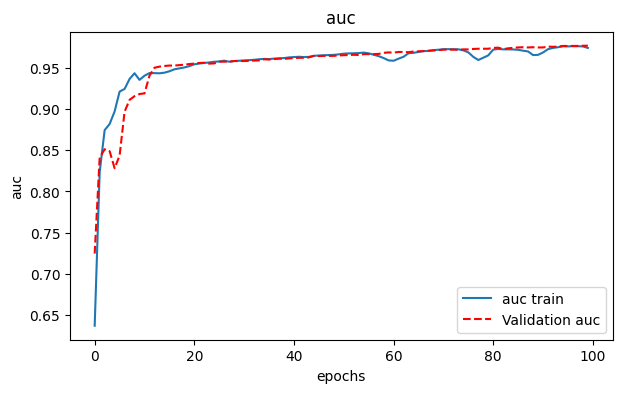

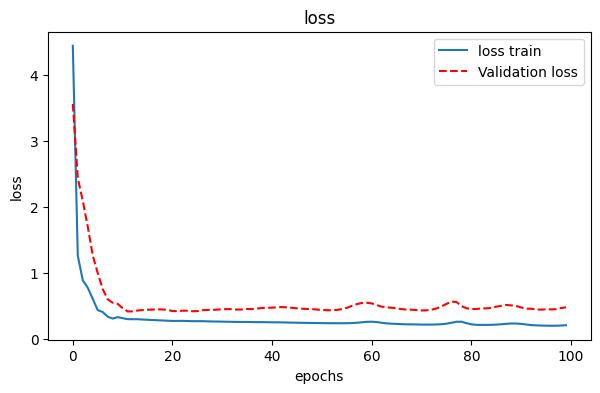

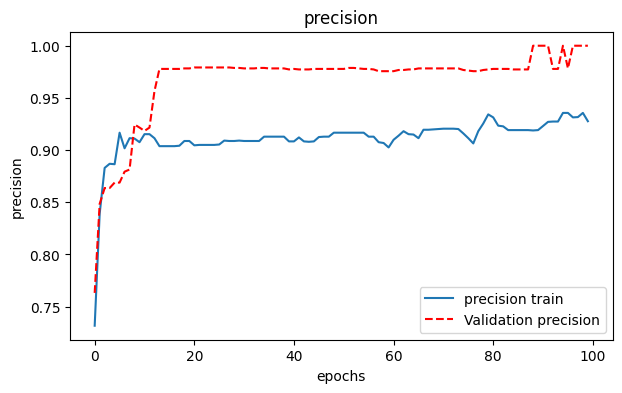

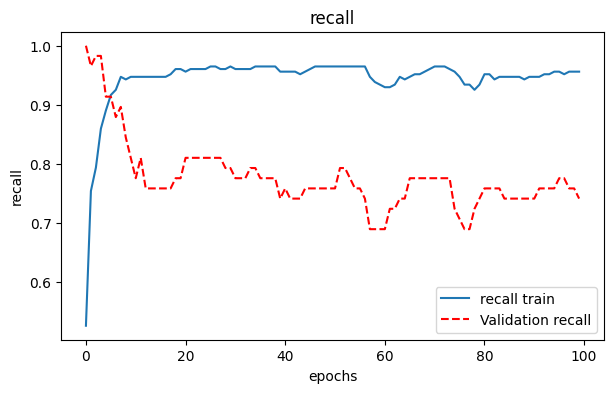

In [ ]:
def plot_history(df_history):
    train_metrics = [col for col in df_history.columns if not col.startswith('val_')]
    for metric in train_metrics:
        plt.figure(figsize=(7, 4))
        plt.plot(df_history[metric], label=(f'{metric} train'))
        
        val_metric = f'val_{metric}'
        if val_metric in df_history.columns:
            plt.plot(df_history[val_metric], label=f'Validation {metric}', linestyle='dashed', color='red')

        plt.title(metric)
        plt.xlabel('epochs')
        plt.ylabel(metric)
        plt.legend()
        plt.show()            

plot_history(df_history)   

In [10]:
test_loss_bce, test_accuracy, test_precision, test_recall, test_auc = model.evaluate(X_test, y_test)
print('test_loss_bce', test_loss_bce)
print('test_accuracy', test_accuracy)
print('test_precision', test_precision)
print('test_recall', test_recall)
print('test_auc', test_auc)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8689 - auc: 0.9977 - loss: 0.2912 - precision: 1.0000 - recall: 0.7939 
test_loss_bce 0.3122956156730652
test_accuracy 0.859649121761322
test_precision 1.0
test_recall 0.7746478915214539
test_auc 0.9973796606063843


In [13]:
y_pred = model.predict(X_test).ravel() # lo pasamos a 1D
y_pred[:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([4.5996994e-02, 1.3683607e-16, 3.4855199e-07, 9.5468962e-01,
       9.8245561e-01], dtype=float32)

In [16]:
y_pred_binario = np.where(y_pred >= 0.5, 1, 0)
y_pred_binario

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0])

In [15]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("accuracy: ", accuracy_score(y_test, y_pred))
print("precision: ", precision_score(y_test, y_pred))
print("recall (Sensitivity): ", recall_score(y_test, y_pred))
print("F1-score: ", f1_score(y_test, y_pred))
print("AUC: ", roc_auc_score(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [20]:

from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score
print("accuracy: ", accuracy_score(y_test, y_pred_binario))
print("precision: ", precision_score(y_test, y_pred_binario))
print("recall (Sensitivity): ", recall_score(y_test, y_pred_binario))
print("F1-score: ", f1_score(y_test, y_pred_binario))
print("AUC: ", roc_auc_score(y_test, y_pred_binario))
print(classification_report(y_test, y_pred_binario))

accuracy:  0.8596491228070176
precision:  1.0
recall (Sensitivity):  0.7746478873239436
F1-score:  0.873015873015873
AUC:  0.8873239436619718
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        43
           1       1.00      0.77      0.87        71

    accuracy                           0.86       114
   macro avg       0.86      0.89      0.86       114
weighted avg       0.90      0.86      0.86       114



In [18]:
df_comparison = pd.DataFrame({'real': y_test, 'prediccion': y_pred_binario})
df_comparison


,real,prediccion
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
109,1,0
110,0,0
111,1,1
112,1,0


In [21]:
# guardamos el modelo
model.save('bclassification_model.keras')